**Internship Studio: Machine Learning Project (Batch: 29th July'20)**
**Title: Marketing Campaign for Banking Products**

**Submitted by: ANUSHKA RAJ(rajanushka799@gmail.com)**

-------------------------------------------------------------------------------------------------

***PROJECT:***

The retail marketing department has to devise campaigns with better target on marketing, to increase the sucess ratio with minimal budget.The department wants to build a model that will helps them identify the potential customers who have higher probability of purchasing the loan.This will increase the sucess ratio while at the same time reduce the cost of the campaign.

The dataset contains data of 5000 customers.

The case is that the Bank has a customers data with various characteristics of the customers.The management built a new product~Personal Loan, and ran a small campaign towards selling the New Product to their clients. After sometime, 9% of customers have personal loan from the bank.

The goal is:

    1.   To sell more personal loan products to bank customers.
    2.   To devise campaigns that better target marketing to increase the sucess ratio with a minimal budget
    3.   To identify the potential customers who have a higher probability of purchasing the loan.
Increase the sucess ratio of advertisement campaign while at the same time reduce the cost of the campaign.

**1. Importing the required libraries for EDA**

In [203]:
import pandas as pd                  # Pandas: For reading the CSV Dataset file, creating DataFrames and performing analysis
import numpy as np                   # NumPy: For suitable array operations in an easier way
import seaborn as sns                # Seaborn: For the purpose of visualization of data using various plots
import matplotlib.pyplot as plt      # Matplotlib: For plotting the graphs
%matplotlib inline
# SciKit learn: The Python library for scientific ML techniques
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
sns.set_style("white")               # The plots color style is set to 'white'
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [204]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1 (2).xlsx


**1.1 Loading the data into the data frame.**

In [205]:
import io
!pip install -q xlrd
#df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling 1.xlsx']))
df= pd.read_excel('Bank_Personal_Loan_Modelling 1.xlsx',sheet_name='Data')


In [206]:
# Let's see if we have correctly imported the data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [207]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 12 features.The aim is to construct a model that can identify potential customers who have a higher probability of purchasing loan output column is personal loan.Features are detailed below:

Age: Customers age

Experience: Number of years of professional experience

Income: Annual income of the customer

ZIP Code: Home Address ZIP code

Family: Family size of the customer

CCAvg: Average spending on credit cards per month

Education: Education level. 1)Undergraduate. 2)Graduate. 3)Professional

Mortage: Value of house mortage if any

Securities Account: Does the customer have a security account with the bank?

CD Account: Does the customer have a certificate of deposit account with the bank?

Online: Does the customer use internet banking facilities?

Credit Card: Does the customer uses a credit card issued by Universal Bank?

Personal Loan: Did the customer accept the personal loan offered in the last campaign?

**2) Data Summary:**

Now we will check our DataFrame df's brief information, datatypes in our columns and all other summary

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [209]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [210]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [211]:
df.shape

(5000, 14)

In [212]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [213]:
df[df.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [214]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**3) Data Cleaning**

Now we will move on to the next step of cleaning the data by checking for any missing or infeasible data. This will make the Dataset make suitable for applying Machine Learning algorithms

As we can observe from our last cell results, some of the values are negative, which is not possible since the range of the variable 'Experience' is [0, inf]. We will set the negative values to the median of the remaining values in that column. The reason for choosing Median and not Mean is that Mean is sensitive to outliers in the Dataset while the Median is not.

In [215]:
df[df['Experience'] < 0]['Experience'].count()

52

In [216]:
# Setting the negative values equal to the Median
lmdvalue = int(df['Experience'].median())
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
        df['Experience'].iloc[i] = lmdvalue

In [217]:
df[df['Experience'] < 0]['Experience'].count()

0

In [218]:
# Let's set ID column as the Index column since it will not affect the Model prediction
df.set_index(['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [219]:
# To avoid the inconvenience, let's lowercase all the column labels
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

**4) Exploratory Data Analysis (EDA)**:

Let us visualize the given Dataset using Seaborn library plots so that we can get some idea of the various patterns, if any. Let's first go sequentially with the tasks assigned as per the project document.



In [220]:
# Finding the number of unique values in each of the columns
df.nunique()

age                    45
experience             44
income                162
zip code              467
family                  4
ccavg                 108
education               3
mortgage              347
personal loan           2
securities account      2
cd account              2
online                  2
creditcard              2
dtype: int64

**Taking a deeper dive into the nature of Features or Variables-**

1) ID: We have already set this as our Index column. Can be safely omitted from EDA.

2) Age: The Customer's age is a Numerical data of type Interval.

3) Income: Annual Income of customers is a Numerical data of type Ordinal. One of the key feature for our Model prediction.

4) ZIP Code: Home address of the Customers. Need not be considered in EDA.

5) Family: Family size of the customer. Need not be considered in EDA.

6) CC Avg.: Credit cards spending per month ($000). This is a Numerical data type which will give us an idea overall economic level of a Customer.

7) Education: This is a Nominal categorical data type.

8) Mortgage: This Numerical data type gives the value of House mortgage.

9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

With this, we can broadly divide our Dataset into

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [221]:
# Let's find the Columns having Numerical data
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [222]:
numeric_features.head()

,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [223]:
# Finding the number of people with zero Mortgage value
df[df['mortgage'] == 0]['mortgage'].count()

3462

In [224]:
# Finding the number of people with no Credit card spending per month
df[df['ccavg'] == 0]['ccavg'].count()

106

Now we will find the Value counts of our Categorical columns-

In [225]:
df['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [226]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [227]:
df['securities account'].value_counts()

0    4478
1     522
Name: securities account, dtype: int64

In [228]:
df['cd account'].value_counts()

0    4698
1     302
Name: cd account, dtype: int64

In [229]:
df['online'].value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [230]:
df['creditcard'].value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

Now that we have found out the counts of these categorical columns, let's see how many customers who bought the Personal loan use other services provided by the bank.

In [231]:
df_ser = df[['personal loan', 'securities account', 'cd account', 'online', 'creditcard']]
df_serg= df_ser.groupby('personal loan').sum()
df_serg

,securities account,cd account,online,creditcard
personal loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [232]:
df_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
securities account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
cd account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
creditcard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


**Univariate Analysis**

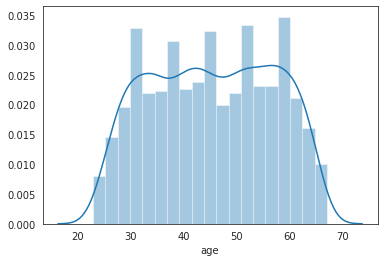

In [233]:
sns.distplot(df['age'], kde=True);

**Observation:**

 We can see a Multi-modal distribution of the 'Age' variable

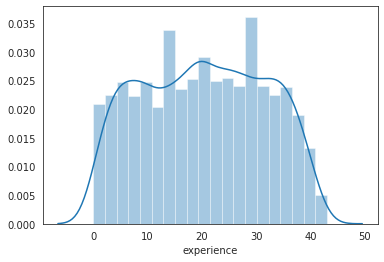

In [234]:
sns.distplot(df['experience']);

**Observation:**

 Again, we can see a Multi-modal and uniform distribution of the 'Experience' variable

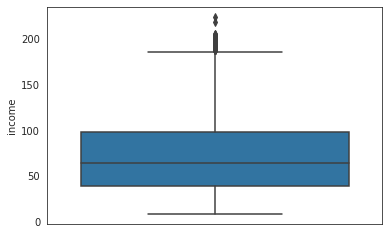

In [235]:
sns.boxplot(df['income'], orient='vertical');

**Observation:**

 We can observe the Median 'Income' to be around $60,000 and there are a lot ou Outliers as well.


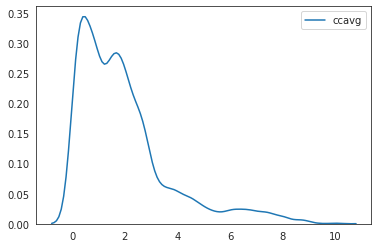

In [236]:
sns.kdeplot(df['ccavg']);

**Observation:**

 A large number of customers spend between $1000-3000 with their Credit cards

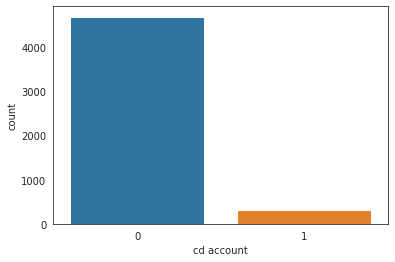

In [237]:
sns.countplot(df['cd account']);

**Observation:**

 Customers who buy Personal loans do not own a CD Account; can be one of the conclusions but we may not affirm to it yet.

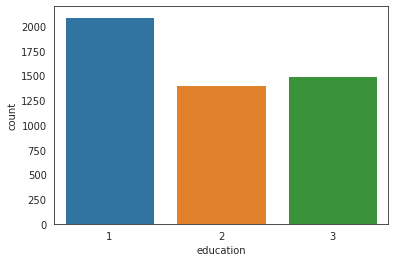

In [238]:
sns.countplot(df['education']);

**Observation:**

 The proportion of education level of our customers is: Undergraduates > Professionals > Graduate

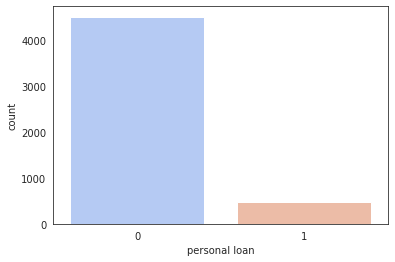

In [239]:
sns.countplot(df['personal loan'], palette='coolwarm');

**Observation:**

A very less portion of Customers accepted a Personal loan in the previous campaign.

**Bivariate Analysis.**

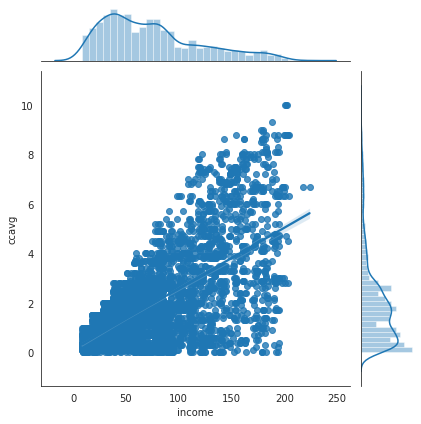

In [240]:
sns.jointplot(x='income',y='ccavg',data=df,kind='reg');

**Observation:**

As intuitive, Credit Card spending is increasing with teh Income level.

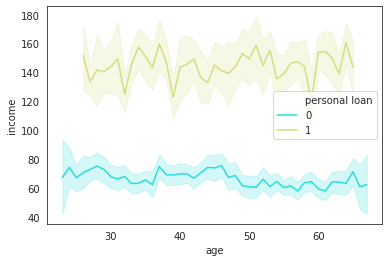

In [241]:
sns.lineplot(x="age", y="income", hue='personal loan', data=df,palette='rainbow');

**Observation:**

We can see that the Customers who accepted the Personal Loan have a relatively higher income than who did not accept it.

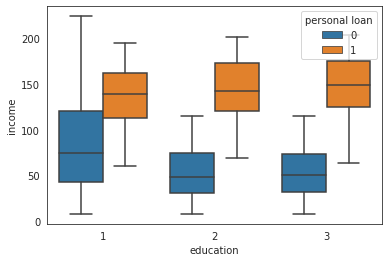

In [242]:
sns.boxplot(x='education', y='income', hue='personal loan', data=df);

**Observation:**

 We can observe the Income level of the Customers who accepted a Personal Loan is higher for every Education level

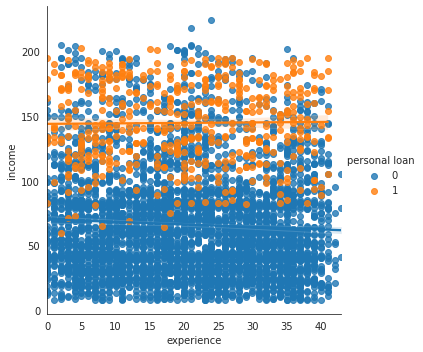

In [243]:
sns.lmplot(x='experience', y='income', hue='personal loan', data=df);

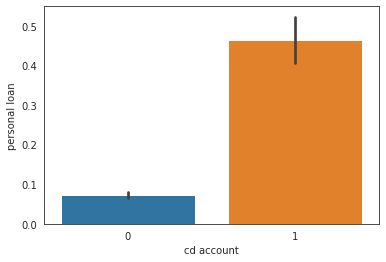

In [244]:
sns.barplot(x='cd account', y='personal loan', data=df);

**Observation:**

 We can see a majority of customers who accepted a Personal loan have a CD account.

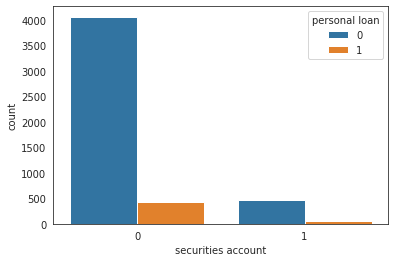

In [245]:
sns.countplot(x='securities account', hue='personal loan', data=df);

**Observation:**

 We can see a majority of customers who did not accept a Personal loan have a Securities account.

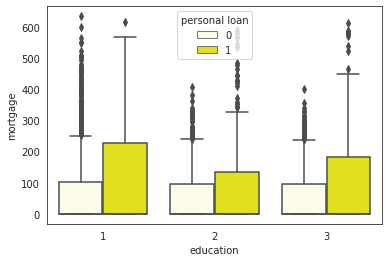

In [246]:
sns.boxplot(x="education", y='mortgage', hue="personal loan", data=df,color='yellow')

**Inference :**

From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

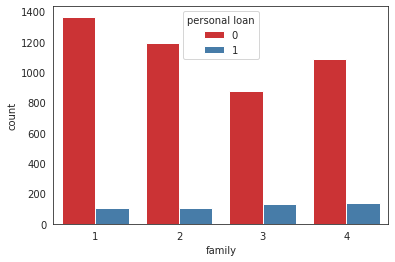

In [247]:
sns.countplot(x='family',data=df,hue='personal loan',palette='Set1')

**Observation:**

 Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

Text(0, 0.5, 'Age')

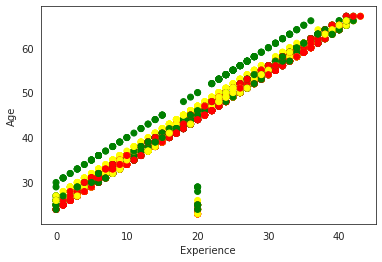

In [248]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['experience'],df['age'],c=df['education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

**Observation-**

 The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

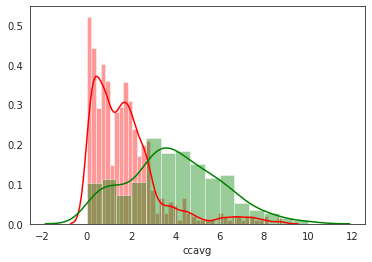

In [249]:
sns.distplot( df[df['personal loan']== 0]['ccavg'], color = 'r');
sns.distplot( df[df['personal loan'] == 1]['ccavg'], color = 'g');

**Observation:**

We can see that Customers accepting a Personal loan have higher Credit card spending. The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

**Multivariate Analysis:**

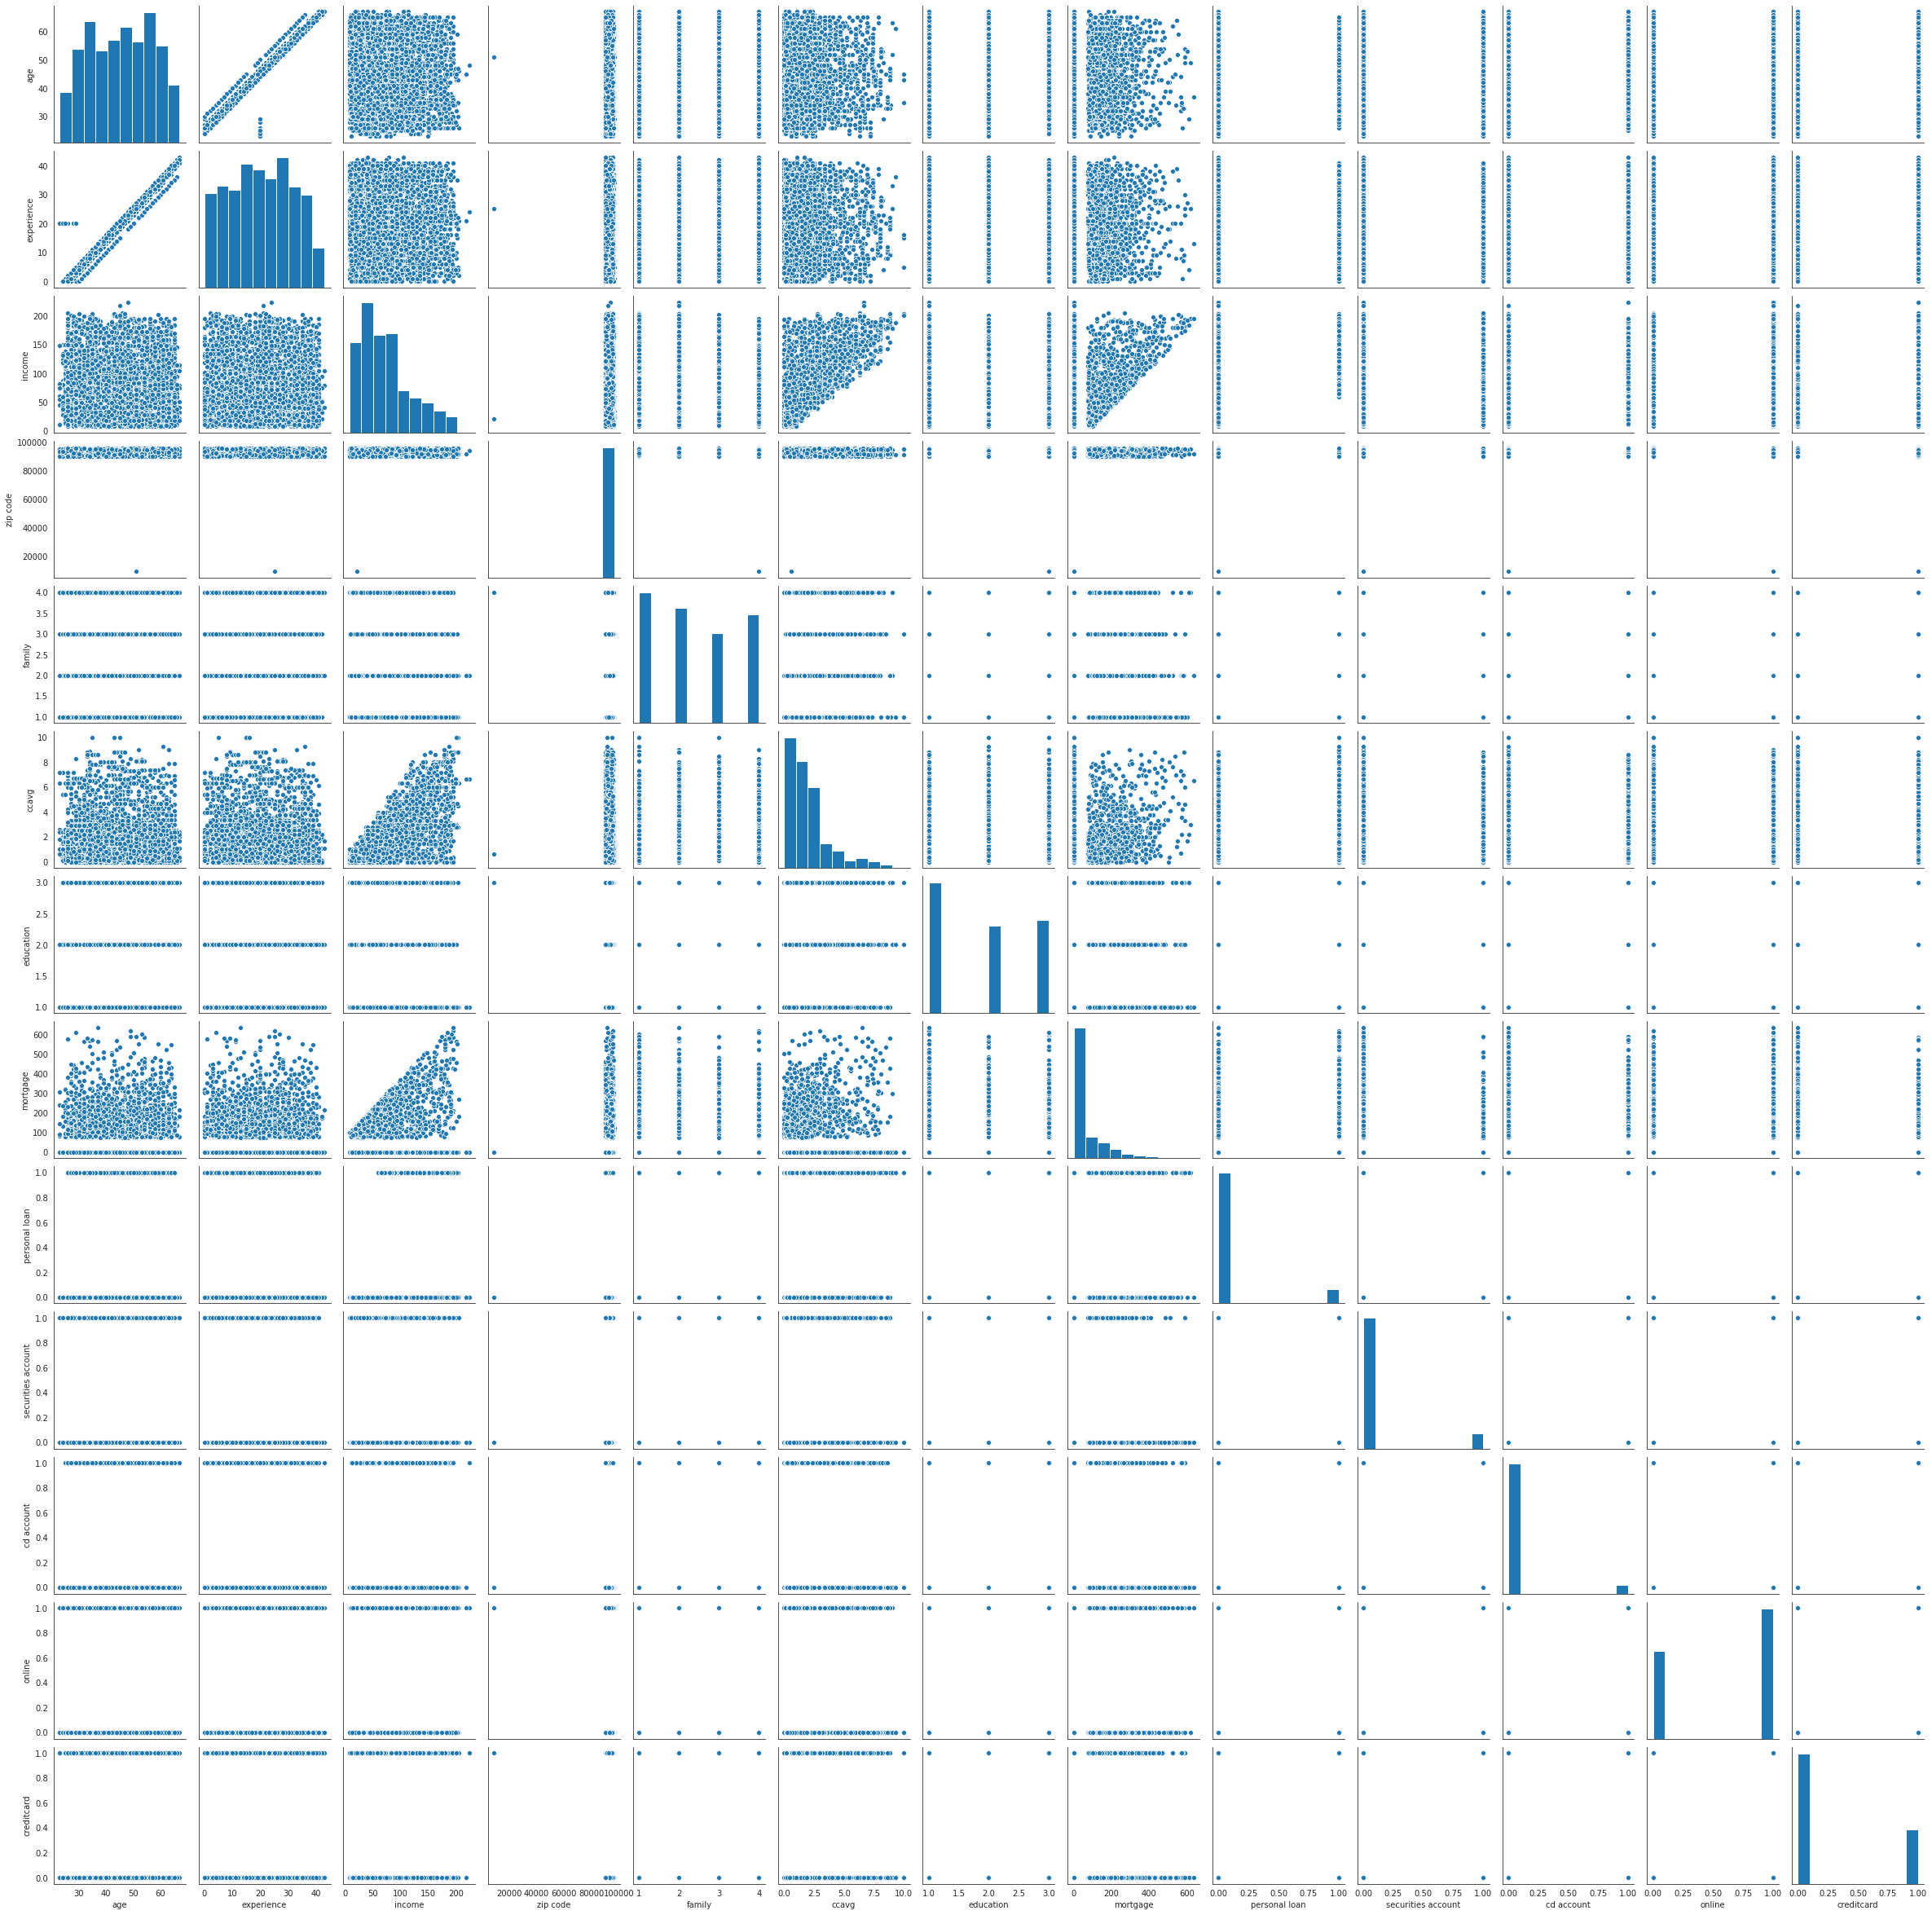

In [250]:
# A pairplot to get a broader perspective
sns.pairplot(df, palette='coolwarm');

1) Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

2) Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

3) Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

4) CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

5) Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

6)The variables family and education are ordinal variables. The distribution of families is evenly distributes

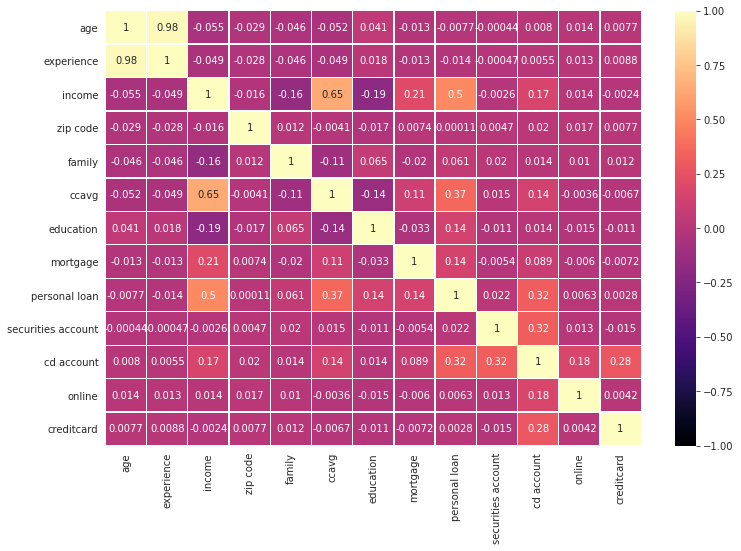

In [251]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='magma',linecolor='white',linewidths=0.25);

**Observation**

Income and CCAvg is moderately correlated.

Age and Experience is highly correlated

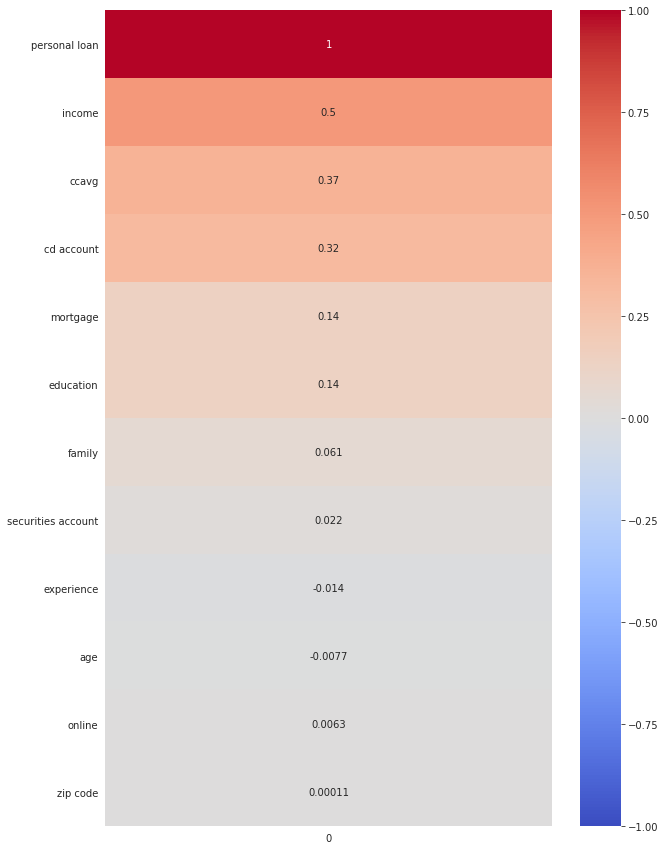

In [252]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = df.corrwith(df['personal loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

**5. Splitting the data using stratified sampling**

In [253]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [254]:
# Let's first separate out our output column 'personal loan'

data_X = df.loc[:, df.columns != "personal loan"]
data_Y = df[["personal loan"]]

In [255]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

Now, let's check each of our Numerical & Ordinal Categorical features in train_X set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not reauired for other Nominal or Binary Categorical features.

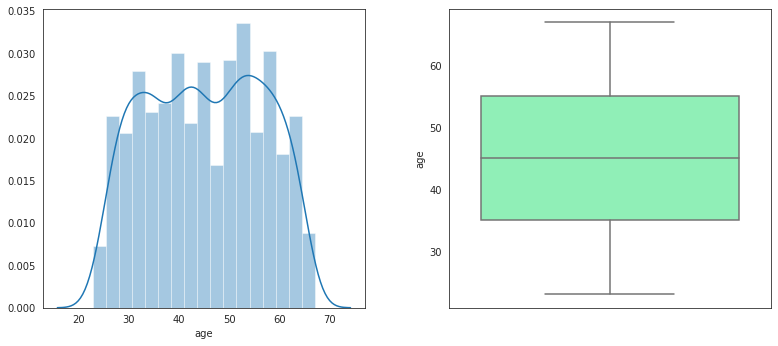

In [256]:
# Feature 1: 'Age' is our Numerical interval data.

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(X_train["age"], ax=axes[0]);
sns.boxplot(X_train["age"], orient="vertical", ax=axes[1], palette = 'rainbow')

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Age' feature.

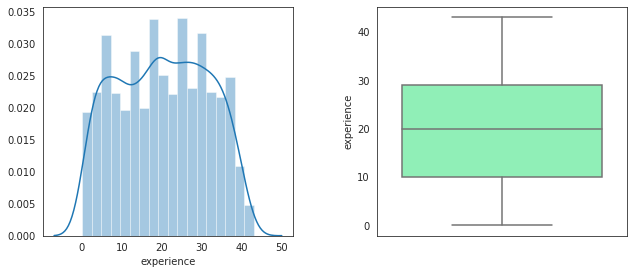

In [257]:
# Feature 2: 'Experience' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["experience"], ax=axes[0]);
sns.boxplot(X_train["experience"], orient="vertical", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Experience' feature

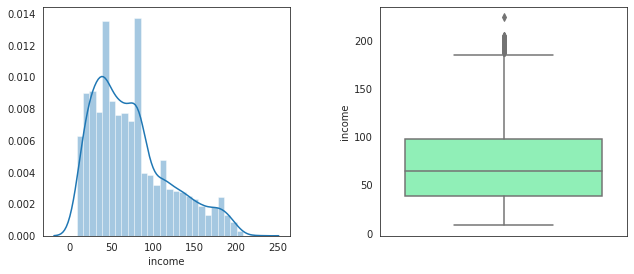

In [258]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["income"], ax=axes[0]);
sns.boxplot(X_train["income"], orient="v", palette="rainbow", ax=axes[1]);

fig.tight_layout(pad=5.0)

Now, we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The reuslting distribution is as shown below:

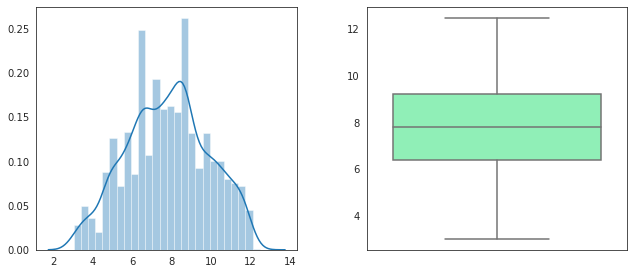

In [259]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well.

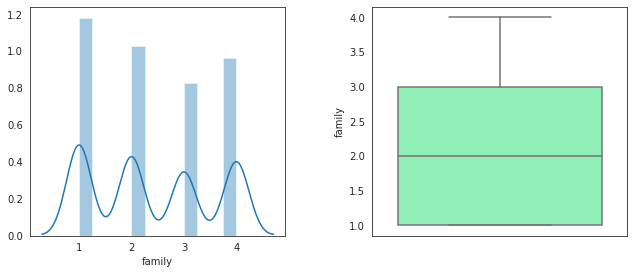

In [260]:
# Feature 4: 'Family' is our Ordinal Categorical data.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["family"], ax=axes[0]);
sns.boxplot(X_train["family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Family' feature

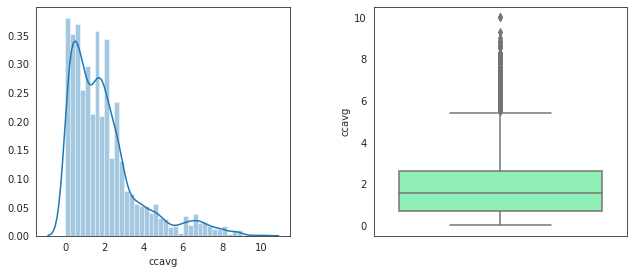

In [261]:
# Feature 5: 'CC Avg' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["ccavg"], ax=axes[0]);
sns.boxplot(X_train["ccavg"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

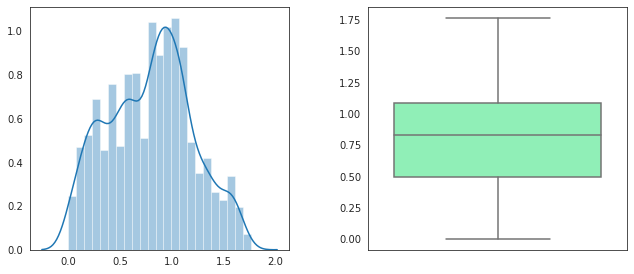

In [262]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["ccavg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["ccavg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'CC Avg' feature is no longer skewed and there are no Outliers as well.

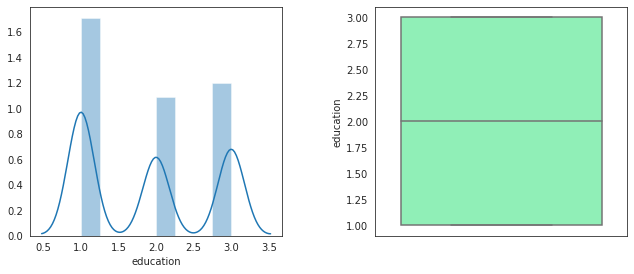

In [263]:
# Feature 6: 'Education' is our Ordinal Categorical data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["education"], ax=axes[0]);
sns.boxplot(X_train["education"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Education' feature.



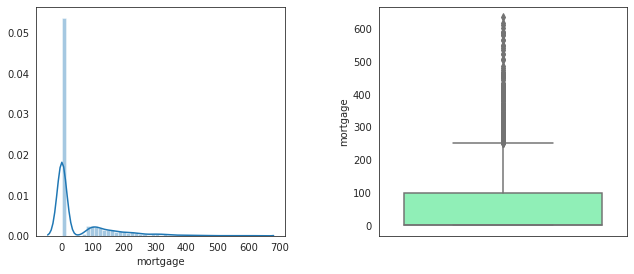

In [264]:
# Feature 7: 'Mortgage' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["mortgage"], ax=axes[0]);
sns.boxplot(X_train["mortgage"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Mortgage' feature is highly skewed and there are a lot of Outliers as well. We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to test_X as well.

In [265]:
X_train["int_mortgage"] = pd.cut(X_train["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("mortgage", axis=1, inplace=True)

X_test["int_mortgage"] = pd.cut(X_test["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("mortgage", axis=1, inplace=True)

The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [266]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

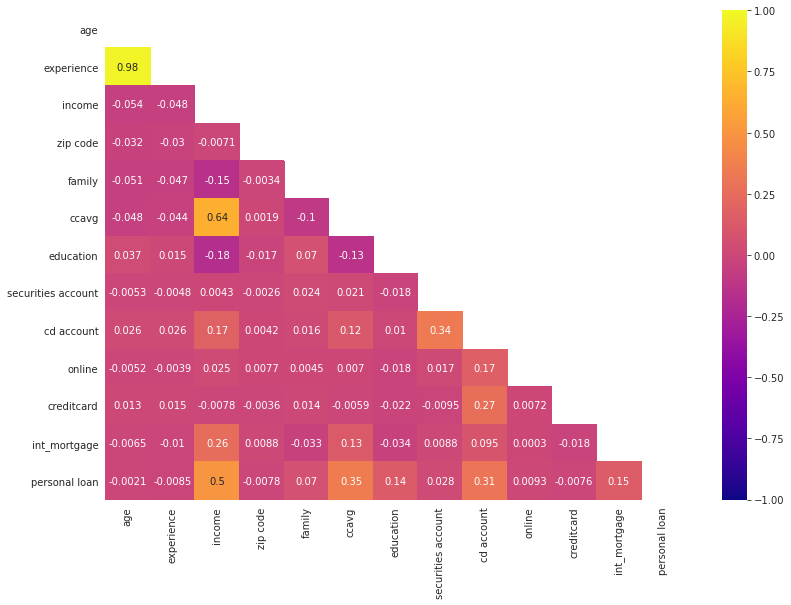

In [267]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="plasma");

In [268]:
X_train.drop("experience", axis=1, inplace=True)
X_test.drop("experience", axis=1, inplace=True)

Model Training & Prediction

**6) Logistic Regression Model** 

In [269]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

Prediction and Evaluation:

In [270]:
logmodel.score(X_train, y_train)

0.952

In [271]:
logmodel.score(X_test, y_test)

0.9513333333333334

In [272]:
logmodel_predict = logmodel.predict(X_test)

In [273]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))



[[1337   19]
 [  54   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



**K-Nearest Neighbours (KNN) Model**

In [274]:
knn_model = KNeighborsClassifier(n_neighbors=21)

In [275]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

Prediction and Evaluation:

In [276]:
knn_model.score(X_train, y_train)

0.9465714285714286

In [277]:
knn_model.score(X_test, y_test)

0.9493333333333334

In [278]:
knn_predict = knn_model.predict(X_test)

In [279]:
cm_knn_model = confusion_matrix(y_test, knn_predict)
print(cm_knn_model)

print(classification_report(y_test, knn_predict))



[[1352    4]
 [  72   72]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.95      0.50      0.65       144

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500



**Naive Bayes Model**

In [280]:
nb_model = GaussianNB()

In [281]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Prediction and Evaluation:

In [282]:
nb_model.score(X_train, y_train)

0.88

In [283]:
nb_model.score(X_test, y_test)

0.8866666666666667

In [284]:
nb_predict = nb_model.predict(X_test)

In [285]:
cm_nb_model = confusion_matrix(y_test, nb_predict)
print(cm_nb_model)

print(classification_report(y_test, nb_predict))



[[1243  113]
 [  57   87]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.43      0.60      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.89      1500



**Random Forest Classifier**

Let's check the Random Forest Classifier performance.

In [286]:
rfmodel = RandomForestClassifier(max_depth=2)

In [287]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
rfmodel.score(X_train, y_train)

0.9182857142857143

In [289]:
rfmodel.score(X_test, y_test)

0.9226666666666666

In [290]:
rf_predict = rfmodel.predict(X_test)

In [291]:
cm_rfmodel = confusion_matrix(y_test, rf_predict)
print(cm_rfmodel)

print(classification_report(y_test, rf_predict))

[[1356    0]
 [ 116   28]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.19      0.33       144

    accuracy                           0.92      1500
   macro avg       0.96      0.60      0.64      1500
weighted avg       0.93      0.92      0.90      1500



# **Decision Tree Classifier**

In [292]:
dtmodel = DecisionTreeClassifier()

In [293]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [294]:
dtmodel.score(X_train, y_train)

1.0

In [295]:
dtmodel.score(X_test, y_test)

0.9826666666666667

In [296]:
dt_predict = dtmodel.predict(X_test)

In [297]:
cm_dtmodel = confusion_matrix(y_test, dt_predict)
print(cm_dtmodel)

print(classification_report(y_test, dt_predict))



[[1345   11]
 [  15  129]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



**7)Comparision of Models**

The Mean and Standard Deviation for the boxplot of LR is: 0.909200 (0.011703)
The Mean and Standard Deviation for the boxplot of KNN is: 0.899200 (0.008998)
The Mean and Standard Deviation for the boxplot of NB is: 0.886800 (0.009042)
The Mean and Standard Deviation for the boxplot of RF is: 0.987200 (0.003816)
The Mean and Standard Deviation for the boxplot of DT is: 0.981800 (0.004423)


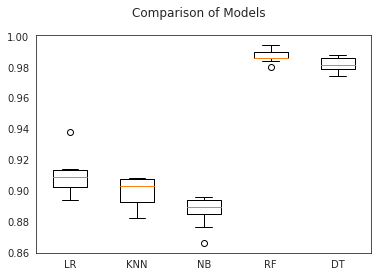

In [298]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10);
	cv_results = cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring);
	results.append(cv_results);
	names.append(name);
	msg = "The Mean and Standard Deviation for the boxplot of %s is: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**8) ROC & AUC for Classification Models**

In [299]:
#Perform Predictions for all the models
PRED_PROB_LOG_RAW=logmodel.predict_proba(X_test)
PRED_PROB_KNN_RAW=knn_model.predict_proba(X_test)
PRED_PROB_NB_RAW=nb_model.predict_proba(X_test)
PRED_PROB_RF_RAW=rfmodel.predict_proba(X_test)
PRED_PROB_DT_RAW=dtmodel.predict_proba(X_test)

In [300]:
#calculate fpr,tpr,threshold
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test, PRED_PROB_DT_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


AUC_LOG_RAW = roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW=roc_auc_score(y_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW=roc_auc_score(y_test,PRED_PROB_DT_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW])

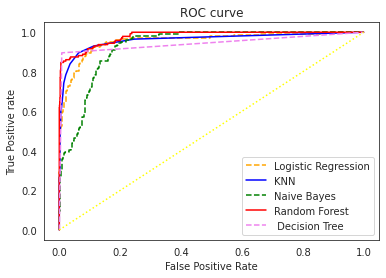

In [301]:
#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label=' Decision Tree')


plt.plot(p_fpr, p_tpr, linestyle=':', color='Yellow')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes

Higher the AUC, better the model is at distinguishing between a customer buying personal Loan and Not buying Personal Loan.

An excellent model has AUC near to the 1 which means it has good measure of separability, As you can see all our models both with raw data and upsampled data have AUC scores near to 1.

However, The AUC score for Logistic Regression Model with Upsampled data has the highest number, so does the ROC curve too.

The Blue line shows that our Logistic model on sampled data alomst covers more region and 96% can predict our class covering both cutomers who will buy and not buy Personal Loan.

By All means , Accuracy, Precision, Recall , ROC & AUC our Logistic regression model on sampled data is the best model for this classification problem though other models are equally close, Our Logistic model has the slight edge with better AUC , ROC as it has better class separability.

**9)Conclusion**

The aim of the universal bank is to convert their liability customers into loan customers. They want to set up a new marketing campaign hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above two graphs , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model.

